# Сборный проект-1. Анализ продаж компьютерных игр

## Описание проекта
Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года и мы планируем кампанию на 2017-й. 

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных из файлов

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [79]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [81]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [82]:
print('Уникальных "Platform":', len(data['Platform'].unique()), data['Platform'].unique())

Уникальных "Platform": 31 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [83]:
print('Уникальных "Genre":', len(data['Genre'].unique()), data['Genre'].unique())

Уникальных "Genre": 13 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Из данных видим, что имеются пропуски в колонках *Year_of_Release, Critic_Score, User_Score, Rating*. Колонка *User_Score* имеет не верный формат *object*. В *Platform* и *Genre* дубликаты отсутствуют.

## Подготовка  данных

Заменим названия столбцов (приведем к нижнему регистру)

In [84]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Преобразуем данные в нужные типы:
- year_of_release в **int**, предварительно заменив пропуски на **0**. В этой колонке указан год, поэтому нам достаточно целочисленного типа для дальнейших расчетов
- user_score в **float**. В этой колонке представлены дробные числа, однако тип данных указан как **object**. Разберемся почему и преобразуем данные

In [85]:
data['year_of_release'] = data['year_of_release'].fillna(0)

С помощью функции заменим **0** на среднее значениее года в зависимости от соответствующей игровой платформы:

In [86]:
data_year = data.groupby('platform')['year_of_release'].median()
 
def func(row):
    if row['year_of_release'] == 0:
        return data_year.loc[row['platform']]
    return row['year_of_release']

data['year_of_release'] = data.apply(func, axis=1).astype('int')

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем столбец 'user_score':

In [87]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Значение **tbd** (дословно - "Подлежит определению") означет что данные о рейтинге отсутствуют или слишком мало оценок. Заменим это значение на ~~**0**~~ **NaN** ~~и преобразуем столбец во **float**~~

In [88]:
#data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype('float64')
#data['user_score'] = data['user_score'].astype('float64')
data['user_score'] =  pd.to_numeric(data['user_score'], errors='coerce')
#data['critic_score'] =  pd.to_numeric(data['user_score'], errors='coerce')

data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

Оброботаем пропуски:

In [89]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

У половины данных ~~в *critic_score* и чуть менее половины данных в *user_score* и~~ *rating* отсутствуют данные. Это может быть обусловлено как и отсутствием системы рейтингов на момент выхода игры, так и недостаточностью оценок для новых игр и иными причинами. Заменим пропуски на **undef** (от "*undefined*")

In [90]:
#data['critic_score'] = data['critic_score'].fillna(0)
#data['user_score'] = data['user_score'].fillna(0)
#data['rating'] = data['rating'].fillna(0)
data['rating'] = data['rating'].fillna('undef')

Строки с отсутствием названия игры (всего 2 строки) удалим и проверим результат предобработки

In [91]:
data.dropna(subset = ['name'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Проверим данные в колонках **platform, genre, rating** на дубликаты

In [92]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [93]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [94]:
data['rating'].value_counts()

undef    6764
E        3990
T        2961
M        1563
E10+     1420
EC          8
RP          3
K-A         3
AO          1
Name: rating, dtype: int64

In [95]:
data.duplicated().sum()

0

Также проверим столбец *name* на повторные названия

In [96]:
data['name'].value_counts()

Need for Speed: Most Wanted           12
Ratatouille                            9
LEGO Marvel Super Heroes               9
Madden NFL 07                          9
FIFA 14                                9
                                      ..
Oddworld: Abe's Oddysee                1
Cyber Sled                             1
RollerCoaster Tycoon 3: Platinum       1
Lizzie McGuire 3: Homecoming Havoc     1
Tekken 3                               1
Name: name, Length: 11559, dtype: int64

In [97]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,undef
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,undef
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,undef
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Данные "чистые", дубликаты отсутствуют. Дубликаты в колонке *name* вызваны тем, что игра выходила на разнах платформах или переиздавалась.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец *all_sales*.

In [98]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.reset_index()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef,31.38


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

In [99]:
data.groupby('year_of_release').agg({'platform': 'count', 'all_sales': 'sum'})

,platform,all_sales
year_of_release,,
1980,9,11.38
1981,63,46.18
1982,36,28.88
1983,17,16.80
1984,14,50.35
1985,14,53.95
1986,21,37.08
1987,16,21.70
1988,15,47.21


Нам выжны не все данные, сгруппируем 1980-1994 года с помощью функции:

In [100]:
def func(row):
    if 1980 <= row['year_of_release'] <= 1994:
        return '1980-1994'
    return row['year_of_release']

data['year_grouped'] = data.apply(func, axis=1)

data.groupby('year_grouped').agg({'platform': 'count', 'all_sales': 'sum'}).query('year_grouped == "1980-1994"')

,platform,all_sales
year_grouped,,
1980-1994,503,669.96


Интересно, что за 15 лет с 1980-1994 было выпущено в два раза меньше игр, чем в 2006 году. А суммарная выручка за эти 15 лет составила примерно столько же, сколько в одном 2009 году.

Посмотрим, как менялись продажи по платформам:

In [101]:
data_platform_sales = data.groupby('platform').agg({'name': 'count', 'all_sales': 'sum'}).sort_values(by=['all_sales'], ascending = False).reset_index()
data_platform_sales

,platform,name,all_sales
0,PS2,2161,1255.77
1,X360,1262,971.42
2,PS3,1331,939.65
3,Wii,1320,907.51
4,DS,2151,806.12
5,PS,1197,730.86
6,GBA,822,317.85
7,PS4,392,314.14
8,PSP,1209,294.05
9,PC,974,259.52


Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [102]:
best_platform_dict = data_platform_sales.query('all_sales > 259')
best_platform = best_platform_dict['platform']
data_pivot = data.pivot_table(index='platform', columns='year_grouped', values='all_sales', aggfunc='sum')

data_pivot = data_pivot.query('platform in @best_platform')
data_pivot

year_grouped,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,1980-1994
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,...,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,0.02
GBA,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,61.64,77.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,...,12.42,20.67,24.28,35.03,23.22,12.38,13.28,8.52,5.25,15.97
PS,35.96,94.70,136.17,172.77,144.53,96.37,35.59,6.67,2.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.03
PS2,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,234.02,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60,NaN
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,NaN
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,...,34.55,42.30,35.04,17.82,7.69,3.14,0.24,0.12,NaN,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.32,223.30,127.95,59.65,21.71,8.59,3.75,1.14,0.18,NaN


Проверим, за какой характерный срок появляются новые и исчезают старые платформы:

In [103]:
platform_life = (data.groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min()).reset_index()
platform_life.columns = ['platform', 'years_life']

platform_life.sort_values(by = 'years_life', ascending = False)

,platform,years_life
13,PC,31
4,DS,28
5,GB,13
28,X360,11
19,PSP,11
16,PS2,11
11,NES,11
3,DC,10
26,Wii,10
17,PS3,10


In [104]:
print('Среднее время жизни платформы:', platform_life['years_life'].mean())

Среднее время жизни платформы: 7.612903225806452


Возьмем данные за соответствующий актуальный период, который определим как **8  лет / 2 года = 4 года** с учетом того, что  на период жизни пллатформы приходится как ее взлет, так и падение, которые занимают приблизительно одинаковое время

In [105]:
data_actual = data.query('year_of_release >= 2013')
data_actual['year_of_release'].value_counts()

2015    606
2014    582
2013    552
2016    502
Name: year_of_release, dtype: int64

In [106]:
data_actual_platform = data_actual.groupby('platform').agg({'name': 'count', 'all_sales': 'sum'}).sort_values(by = 'all_sales', ascending = False).reset_index()
data_actual_platform

,platform,name,all_sales
0,PS4,392,314.14
1,PS3,345,181.43
2,XOne,247,159.32
3,3DS,311,144.44
4,X360,186,136.80
5,WiiU,115,64.63
6,PC,189,39.43
7,PSV,359,33.25
8,Wii,23,13.66
9,PSP,67,3.50


In [107]:
data_actual.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,57.76,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,12.16,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


Как видим, в рассматриваемом периоде лидируют по продажам ~~*PS3, X360, Wii*~~ *PS4, PS3, XboxOne*. Однако PS3 - консоль уходящего поколения, поэтому продажи у нее падают. 

Напротив, у консолей нового поколения - *PS4, XOne* продажи начинают расти. 

У других консолей -  *3DS, WiiU* продажи падают не так сильно, поскольку они появились на год ранее лидеров роста и все еще остаются актульными платформами. 

Отдельным является рынок *PC* игр - несмотря на то, что продажи в связи с выходом нового поколения приставок упали, особенность этой платфоры относительно других (PC всегда можно модернизировать) не позволяет сбрасывать ее со счетов.

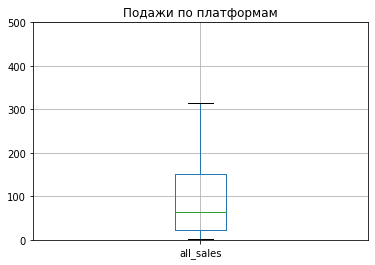

In [108]:
plt.ylim(0, 500)
data_actual_platform.boxplot(column='all_sales')
plt.title('Подажи по платформам')
plt.show()

График «ящик с усами» по глобальным продажам игр в разбивке по платформам показывает, что максимальным значением продаж является 310, он принадлежит PS4 - лидеру по продажам. Редкие значения в рассматриваемом периоде и платформам отсутствуют.

name all_sales                       
         count       sum   min    max      mean
platform                                       
3DS        311    144.44  0.01  14.60  0.464437
PS4        392    314.14  0.01  14.63  0.801378
XOne       247    159.32  0.01   7.39  0.645020

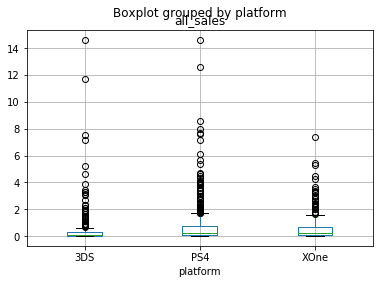

In [144]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
data_top_platform = data_actual.query('platform == "PS4" or platform == "XOne" or platform == "3DS"')
data_top_platform.boxplot(column='all_sales', by='platform')
data_top_platform.groupby('platform').agg({'name': 'count', 'all_sales': ['sum', 'min', 'max', 'mean']})

Посмотрим как влияют на продажи внутри одной популярной платформы (*PS3*) отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем **корреляцию** между отзывами и продажами:

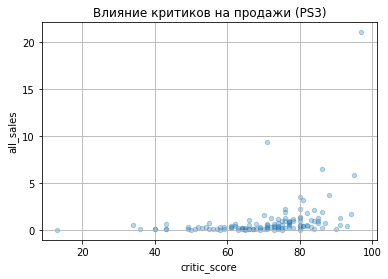

Корреляция между отзывами критиков и продажами (PS3): 0.33380663565061736


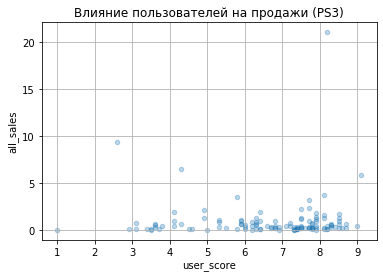

Корреляция между отзывами геймеров и продажами (PS3): 0.02269094327112414


In [109]:
data_ps3 = data_actual.dropna().query('platform == "PS3" and critic_score > 0 and user_score > 0')
data_ps3.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.3)
plt.title('Влияние критиков на продажи (PS3)')
plt.show()
print('Корреляция между отзывами критиков и продажами (PS3):', data_ps3['critic_score'].corr(data_ps3['all_sales']))

data_ps3.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.3) 
plt.title('Влияние пользователей на продажи (PS3)')
plt.show()
print('Корреляция между отзывами геймеров и продажами (PS3):', data_ps3['user_score'].corr(data_ps3['all_sales']))

Заметна невысокая прямая зависимость продаж игр на PS3 от рейтинга критиков, тогда как зависимость от рейтинга пользователей минимальная. Соотнесем выводы с продажами игр на других платформах:

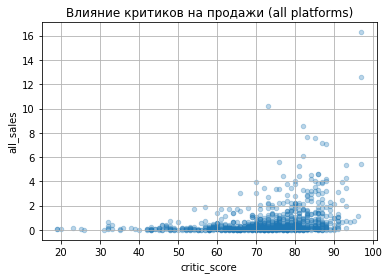

Корреляция между отзывами критиков и продажами (all platforms): 0.3166187626679502


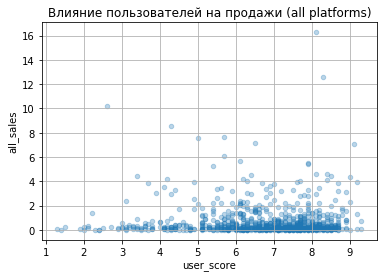

Корреляция между отзывами геймеров и продажами (all platforms): -0.009335980481055975


In [110]:
data_other = data_actual.dropna().query('platform != "PS3" and critic_score > 0 and user_score > 0')
data_other.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.3)
plt.title('Влияние критиков на продажи (all platforms)')
plt.show()
print('Корреляция между отзывами критиков и продажами (all platforms):', data_other['critic_score'].corr(data_other['all_sales']))

data_other.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.3) 
plt.title('Влияние пользователей на продажи (all platforms)')
plt.show()
print('Корреляция между отзывами геймеров и продажами (all platforms):', data_other['user_score'].corr(data_other['all_sales']))

На остальных платформах зависимость продаж от оценок критиков еще меньше, а от оценок пользователей ее почти нет.

Посмотрим на общее распределение игр по *жанрам*.

In [111]:
data_actual.groupby('genre').agg({'name': 'count', 'all_sales': ['mean', 'sum']}).sort_values(by = ('all_sales', 'sum'), ascending = False).reset_index()

genre  name all_sales        
                 count      mean     sum
0         Action   767  0.420169  322.27
1        Shooter   188  1.239628  233.05
2         Sports   215  0.700791  150.67
3   Role-Playing   294  0.497211  146.18
4           Misc   155  0.405290   62.82
5       Platform    74  0.576081   42.63
6         Racing    86  0.464884   39.98
7       Fighting    80  0.441375   35.31
8      Adventure   246  0.096463   23.73
9     Simulation    64  0.347656   22.25
10      Strategy    56  0.180000   10.08
11        Puzzle    17  0.186471    3.17

Жанр *Action* значительно опережает другие по количеству игр и суммам продаж. Жанры *Shooter и Sports* на втором и третьем месте соответственно. 

Самыми непопулярными жанрами оказались *Adventure, Strategy и Puzzle*.

**Средний чек выше всего у жанра *Shooter*, *Sports* на втором месте с сильным отставанием**

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 

In [112]:
display(data_actual.groupby('platform').agg({'name': 'count', 'na_sales': 'sum'}).sort_values(by = 'na_sales', ascending = False).reset_index().head())
display(data_actual.groupby('platform').agg({'name': 'count', 'eu_sales': 'sum'}).sort_values(by = 'eu_sales', ascending = False).reset_index().head())
display(data_actual.groupby('platform').agg({'name': 'count', 'jp_sales': 'sum'}).sort_values(by = 'jp_sales', ascending = False).reset_index().head())

,platform,name,na_sales
0,PS4,392,108.74
1,XOne,247,93.12
2,X360,186,81.66
3,PS3,345,63.50
4,3DS,311,39.04


,platform,name,eu_sales
0,PS4,392,141.09
1,PS3,345,67.81
2,XOne,247,51.59
3,X360,186,42.52
4,3DS,311,31.17


,platform,name,jp_sales
0,3DS,311,67.86
1,PS3,345,23.35
2,PSV,359,18.66
3,PS4,392,15.96
4,WiiU,115,10.88


Как видим, в "домашнем регионе" локальная консоль более популярна - в **Северной Америке** чуть более популярны *XboxONE и Xbox 360*, чем в Европе, тогда как в Японии эти консоли даже не вошла в топ-5. ~~

Для **европейского региона** характерна любовь к *PS3 и PS4*, *XboxONE и  Xbox 360* на третьем и четвертом местах с существенным отставанием от *PS4 и PS3*. 

Рынок **Японии** очень специфичен - на первом месте портативная консоль *3DS*.  Более того, третье место также занимает портативная *PSV*, ктороая даже не вошла в топ-5 в других регионах.



In [113]:
display(data_actual.groupby('genre').agg({'name': 'count', 'na_sales': 'sum'}).sort_values(by = 'na_sales', ascending = False).reset_index().head())
display(data_actual.groupby('genre').agg({'name': 'count', 'eu_sales': 'sum'}).sort_values(by = 'eu_sales', ascending = False).reset_index().head())
display(data_actual.groupby('genre').agg({'name': 'count', 'jp_sales': 'sum'}).sort_values(by = 'jp_sales', ascending = False).reset_index().head())

,genre,name,na_sales
0,Action,767,126.23
1,Shooter,188,109.78
2,Sports,215,65.27
3,Role-Playing,294,46.51
4,Misc,155,27.49


,genre,name,eu_sales
0,Action,767,118.32
1,Shooter,188,87.88
2,Sports,215,60.52
3,Role-Playing,294,37.02
4,Racing,86,20.19


,genre,name,jp_sales
0,Role-Playing,294,51.14
1,Action,767,40.49
2,Misc,155,9.20
3,Fighting,80,7.65
4,Shooter,188,6.61


По жанрам предпочтения в Европе и Северной Америке практически идентичны, а рынок Японии как всегда уникален - на первом месте *Role-Playing* игры, в то время как *шутеры* (2 место в других регионах) лишь на пятом месте. 

In [115]:
display(data_actual.groupby('rating').agg({'name': 'count', 'na_sales': 'sum'}).sort_values(by = 'na_sales', ascending = False).reset_index().head())
display(data_actual.groupby('rating').agg({'name': 'count', 'eu_sales': 'sum'}).sort_values(by = 'eu_sales', ascending = False).reset_index().head())
display(data_actual.groupby('rating').agg({'name': 'count', 'jp_sales': 'sum'}).sort_values(by = 'jp_sales', ascending = False).reset_index().head())

,rating,name,na_sales
0,M,369,165.21
1,undef,980,89.70
2,E,304,79.17
3,E10+,254,54.50
4,T,335,50.08


,rating,name,eu_sales
0,M,369,145.32
1,E,304,83.38
2,undef,980,78.91
3,E10+,254,42.88
4,T,335,42.00


,rating,name,jp_sales
0,undef,980,85.10
1,T,335,20.66
2,E,304,15.14
3,M,369,14.11
4,E10+,254,5.89


В Европе и США наиболее популярен рейтинг 17+(M), следом идут игры 6+(E) и игры без определенного рейтинга. В Японии игры без определенного рейтинга на первом сместе, на втором месте игры 13+. 

## Проверка гипотез

Проверим гипотезу:
- Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.

Так будет звучать нулевая гипотеза, тогда как альтернативная гипотеза - о том, что данные рейтинги отличаются.

In [118]:
data_xone = data_actual.dropna().query('platform == "XOne"')
data_pc = data_actual.dropna().query('platform == "PC"')

sample_1 = data_xone['user_score']
sample_2 = data_pc['user_score']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ *Xbox One и PC* одинаковые. Это обусловлено тем, что эти платформы очень похожи по выпускаемым на них играм, в то время как японские консоли (Playstation, Nintendo) имеют массу специфических и эксклюзивных игр.

Проверим гипотезу:
- Средние пользовательские рейтинги жанров **Action и Sports** разные.

Так будет звучать альтернативная гипотеза, тогда как нулевая гипотеза - о том, что данные рейтинги жанров одинаковые.

In [119]:
data_action = data_actual.dropna().query('genre == "Action"')
data_sports = data_actual.dropna().query('genre == "Sports"')

sample_1 = data_action['user_score']
sample_2 = data_sports['user_score']

alpha = .05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.632748894194211e-16
Отвергаем нулевую гипотезу


Нулевая гипотеза - о том, что данные рейтинги жанров одинаковые, нами отвергнута. При этом, не отвергаем *альтернативную гипотезу* о том, что средние пользовательские рейтинги жанров Action и Sports разные. Это может быть обусловлено разной целевой категорией пользователей данных жанров.

## Вывод

В результате анализа нами рассчитано среднее время жизни платформы и рассмотрены данные за последние ~~**8** лет~~ **4 года**.
В результате анализа установлено, что к концу жизни платформы продажи падают, поэтому нет смысла вкладывать средства в рекламу игр на таких платформах, даже не смотря на то, что ранее продажи игр на этих платформах били рекорды.

Мы рекомендуем сосредоточить внимание на играх консолей нового поколения *PS4, XOne* в большей степени и *3DS, WiiU* - в меньшей. Особняком стоит рынок *PC-игр*, который мы бы не стали сбрасывать со счетов.

Нами таже замечена небольшая зависимость продаж от рейтинга критиков, но она в основном характерна для Playstation. Поэтому наиболее актуальными в будущем нам представляется классические рекламные компании, и лишь небольшу часть рекламного бюджета мажно направить на повышение рейтинга продукта в игровой прессе.

Относительно жанров и регионов нами установлено следующее:
- Жанр **Action** значительно опережает другие по количеству игр и суммам продаж. Жанры **Shooter** и **Sports** на втором и третьем месте соответственно.
- По жанрам предпочтения в *Европе* и *Северной Америке* идентичны, а рынок *Японии* уникален - на первом месте **Role-Playing** игры, в то время как шутеры (2 место в других регионах) лишь на 5.
- В Европе и Северной Америке наибольшая возрастная группа - 17+, во всех регионах по полярны так же аудитории 6+, 13+.

При подготовке рекламных компаний также следует учитывать, что рынки **Xbox One** и **PC** очень схожи по выпускаемым играм и аудитории, в то время как аудитория игр жанров **Action** и **Sports** различается